<a href="https://colab.research.google.com/github/karenyxwang/Machine_Learning/blob/master/Fairness%20Auditing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 7

*Note: due dates have been suspended. Complete your work when you are in a safe place to do so. If you have any concerns about access to devices or scheduling your work, or if you are sick and cannot complete the assignment, you can email me directly. There are no deadlines.*

For this assignment we will be working with a dataset of 1,267 patient records at a Korean hospital’s emergency department. The dataset you’ll receive contains 18 variables. You will use five of them:


Two protected attributes: 
   - `Age`
   - `Sex`

Two measures of the patient’s triage level, from 1 (highest emergency) to 5 (non-urgent).
   - `Nurse Triage` was reported by a nurse in real time at the hospital.
   - `Expert Triage` was evaluated by a team of two experts looking at the case history retrospectively.

One final measure of the patient’s final outcome
   - `Discharge` patients were sent home after their visit.
   - The other options all involve more serious outcomes of some kind: `Admission` to the hospital, `Transfer` to a different facility, `Surgery` or `Death`.


In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=13r36hDGjphjiKHVb6kpkAiqmmFeg6TAM' -O triage.csv

--2020-05-09 01:20:51--  https://docs.google.com/uc?export=download&id=13r36hDGjphjiKHVb6kpkAiqmmFeg6TAM
Resolving docs.google.com (docs.google.com)... 173.194.216.101, 173.194.216.113, 173.194.216.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/god8jjj1gm86e3vrjkafifpt2vkgqls8/1588987200000/09640029349513786515/*/13r36hDGjphjiKHVb6kpkAiqmmFeg6TAM?e=download [following]
--2020-05-09 01:20:51--  https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/god8jjj1gm86e3vrjkafifpt2vkgqls8/1588987200000/09640029349513786515/*/13r36hDGjphjiKHVb6kpkAiqmmFeg6TAM?e=download
Resolving doc-14-b0-docs.googleusercontent.com (doc-14-b0-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-14-b0-docs.googleusercontent.com (doc-14

In [ ]:
import pandas as pd
df = pd.read_csv("triage.csv")
df


,Age,Sex,Arrival mode,Complaint,Diagnosis,Injury,Alertness,Pain,Pain Scale,Systolic BP,Diastolic BP,Heart Rate,Respiratory Rate,Temperature,Oxygen Saturation,Nurse Triage,Expert Triage,Disposition
0,71,Male,Car,right ocular pain,Corneal abrasion,Injury,Awake,Pain,2.0,160,100,84,18,36.6,100,2,4,Discharge
1,56,Female,Car,right forearm burn,"Burn of hand, firts degree dorsum",Injury,Awake,Pain,2.0,137,75,60,20,36.5,NaN,4,5,Discharge
2,68,Female,Ambulance,"arm pain, Lt","Fracture of surgical neck of humerus, closed",Injury,Awake,Pain,2.0,130,80,102,20,36.6,98,4,5,Admission
3,71,Male,Walking,ascites tapping,Alcoholic liver cirrhosis with ascites,Non-Injury,Awake,Pain,3.0,139,94,88,20,36.5,NaN,4,5,Discharge
4,58,Male,Car,"distension, abd",Ascites,Non-Injury,Awake,Pain,3.0,91,67,93,18,36.5,NaN,4,5,Discharge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,79,Male,Ambulance,mental change,Cerebral infarction due to unspecified occlusi...,Non-Injury,Awake,No Pain,NaN,120,80,86,22,36.4,95,2,2,Admission
1263,81,Male,Car,dysuria,Dysuria,Non-Injury,Awake,No Pain,NaN,120,80,94,20,36.4,97,4,4,Discharge
1264,81,Male,Ambulance,dizziness,Dizziness and giddiness,Non-Injury,Awake,No Pain,NaN,130,90,80,20,36.2,99,3,3,Discharge
1265,81,Female,Ambulance,"Sensory, Decreased","Cord compression, unspecified",Injury,Awake,No Pain,NaN,170,100,78,20,36.6,98,3,3,Surgery


## Task 1 *(4 points)*

Define four new binary variables `Nurse High-Risk`, `Expert High-Risk`, `Age Group`, and `Discharged`
   - A patient is defined as `High-Risk` if their triage score is 1-3.
   - `Age Group` should be a binary variable. Choose the cutoff threshold based on your inspection of the data.
   - `Discharged` should have a value of True if the patient was immediately discharged, and False otherwise.


In [ ]:
df.describe()

,Age,Pain Scale,Nurse Triage,Expert Triage
count,1267.000000,711.000000,1267.000000,1267.000000
mean,54.423836,4.104079,3.335438,3.265983
std,19.725033,1.419332,0.885391,0.885803
min,16.000000,1.000000,1.000000,1.000000
25%,37.000000,3.000000,3.000000,3.000000
50%,57.000000,4.000000,3.000000,3.000000
75%,71.000000,5.000000,4.000000,4.000000
max,96.000000,10.000000,5.000000,5.000000


In [ ]:
df['Nurse High-Risk'] = df['Nurse Triage'].apply(lambda x: 0 if x>3 else 1)
df['Expert High-Risk'] = df['Expert Triage'].apply(lambda x: 0 if x>3 else 1)
df['Age Group'] = df['Age'].apply(lambda x: 1 if x>54 else 0)
df['Discharged'] = df['Disposition'].apply(lambda x: True if x=='Discharge' else False)

## Task 2 *(4 points)*

Using nurse triage scores, calculate baseline distributions of triage scores in this dataset. Also calculate baseline distributions of discharge rates. Then, calculate those distributions divided by age group and sex. 

Do triage scores and discharge rates differ in the population based on age and sex?


### Nurse triage scores distributions

The baseline distributions of nurse triage scores show that the majority of the population (75%) fall into emergency categories 3 and 4. There are the least number of people being diagnosed as "highest emergency" (1.4%) and the second least number of people as "non-urgent" (6.9%).

Distribution of nurse triage scores
4    0.395422
3    0.352802
2    0.168903
5    0.068666
1    0.014207
Name: Nurse Triage, dtype: float64



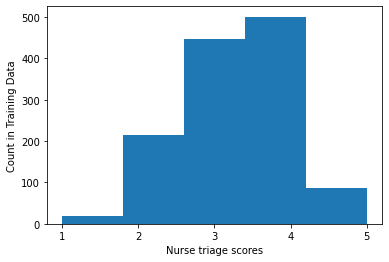

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("Distribution of nurse triage scores")
print(df['Nurse Triage'].value_counts()/len(df))
print()

plt.hist(df['Nurse Triage'], bins=5)
plt.xticks(np.arange(1, 6, 1))
plt.xlabel("Nurse triage scores")
plt.ylabel("Count in Training Data")
plt.show()

The distribution of nurse triage scores based on age shows that the older age group is far more likely than the younger age group to be diagnosed as 1 "highest emergency", 2 "second-highest emergency", and 5 "non-urgent". Almost all people diagnosed as highest emergency are from the older age group. The older age group and the younger age group are about equally likely to have traige scores of 3 and 4.

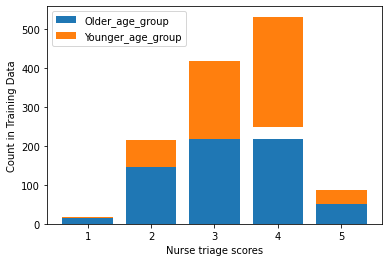

In [ ]:
older_age_group = df.loc[df['Age Group']==1]
younger_age_group = df.loc[df['Age Group']==0]

plt.bar(older_age_group['Nurse Triage'].value_counts().index, older_age_group['Nurse Triage'].value_counts())
plt.bar(younger_age_group['Nurse Triage'].value_counts().index, younger_age_group['Nurse Triage'].value_counts(), bottom = older_age_group['Nurse Triage'].value_counts())
plt.legend(["Older_age_group", "Younger_age_group"])
plt.xlabel("Nurse triage scores")
plt.ylabel("Count in Training Data")
plt.show()

The distribution of nurse triage scores based on sex shows that male is far more likely than female to be diagnosed as 1 "highest emergency". Almost all people diagnosed as highest emergency are male. Female, on the other hand, is slightly more likely to be diagnosed as 2 "Second highest emergency" and 5 "non-urgent". Male and Female are  equally likely to have traige scores of 3 and 4.

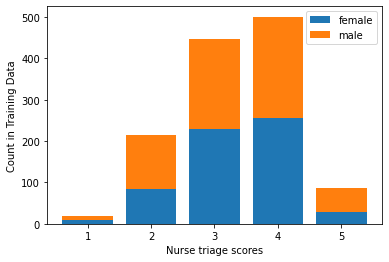

In [ ]:
female = df.loc[df['Sex']=='Female']
male = df.loc[df['Sex']=='Male']

plt.bar(female['Nurse Triage'].value_counts().index, female['Nurse Triage'].value_counts())
plt.bar(male['Nurse Triage'].value_counts().index, male['Nurse Triage'].value_counts(), bottom = female['Nurse Triage'].value_counts())
plt.legend(["female", "male"])
plt.xlabel("Nurse triage scores")
plt.ylabel("Count in Training Data")
plt.show()

### Discharge Rates Distribution

The baseline distributions of discharge rates show that the majority of the population (65%) are discharged.

Distribution of discharge rates
True     0.649566
False    0.350434
Name: Discharged, dtype: float64



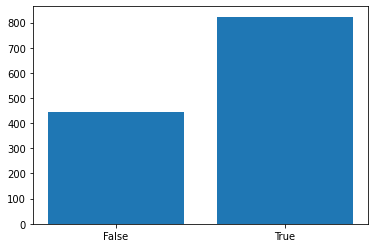

In [ ]:
print("Distribution of discharge rates")
print(df['Discharged'].value_counts()/len(df))
print()

discharge_status = df['Discharged'].groupby(df['Discharged']).count()
plt.bar(discharge_status.index, discharge_status)
plt.xticks(np.arange(0,2,1))
plt.xticks([0,1], ["False", "True"])
plt.show()

The distribution of discharge rates based on age groups shows that although there are equal number of old and young people being discharged, the older age group is more likely than the younger age group to not be discharged.

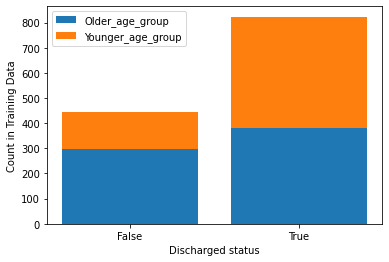

In [ ]:
plt.bar(older_age_group['Discharged'].value_counts().index, older_age_group['Discharged'].value_counts())
plt.bar(younger_age_group['Discharged'].value_counts().index, younger_age_group['Discharged'].value_counts(), bottom = older_age_group['Discharged'].value_counts())
plt.legend(["Older_age_group", "Younger_age_group"])
plt.xlabel("Discharged status")
plt.ylabel("Count in Training Data")
plt.xticks(np.arange(0, 2, 1))
plt.xticks([0,1], ["False", "True"])
plt.show()

The distribution of discharge rates based on sex shows that there is not much difference between male and female regarding discharge status.

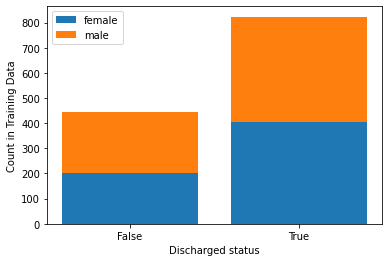

In [ ]:
female = df.loc[df['Sex']=='Female']
male = df.loc[df['Sex']=='Male']

plt.bar(female['Discharged'].value_counts().index, female['Discharged'].value_counts())
plt.bar(male['Discharged'].value_counts().index, male['Discharged'].value_counts(), bottom = female['Discharged'].value_counts())
plt.legend(["female", "male"])
plt.xlabel("Discharged status")
plt.ylabel("Count in Training Data")
plt.xticks(np.arange(0, 2, 1))
plt.xticks([0,1], ["False", "True"])
plt.show()

## Task 3 *(8 points)*

Let's define a “predicted positive” case as any patient with a high-risk triage rating, and a “true positive” case as any patient that was **NOT** immediately discharged. 

Using nurse triage scores: 
   - Calculate the false positive rate and false negative rate for the population as a whole
   - Then calculate FPR and FNR for subgroups divided by age group and sex. 

How do false positive and false negative rates differ for subgroups? Are there any group fairness concerns that you see? It is okay if you do or do not see any concerns; either way, you should give specific quantitative evidence for your answer.



For the population as a whole, the false positive rate is 50.07% while the false negative rate is 17.86%.

In terms of age subgroups, the false positive rates for the younger age group is much higher than the older age group by about 20%, which means that nurses are more likely to predict young people have high-risk conditions while they actually don't have. However, the false negative rate for the older age group is higher than the younger group by about 10%. This is problematic because it shows older people have a higher chance to be misdiagnosed to be not high-risk while they are actually severely ill, which may cause delay to treatment. 

In terms of sex subgroups, the false positive rate for female is slightly higher than male by slightly less than 10%, meaning that female patients have a higher chance to be misdiagnosed as high-risk while they are actually fine. The false negative rate for female is also higher than male by less than 10%, which means that female patients also have a higher change to be misdiagonsed to be not high-risk while they are actually in high-risk condition. All in all, it shows that nurses are worse at diagnosing female patients than male patients. 

In [ ]:
false_positive = df.loc[(df['Nurse High-Risk']==1) & (df['Discharged']==True)]
false_positive_rate = len(false_positive) / len(df.loc[df['Nurse High-Risk']==1])
print(f"The false positive rate for the whole population is {false_positive_rate}")

The false positive rate for the whole population is 0.5007363770250368


In [ ]:
false_negative = df.loc[(df['Nurse High-Risk']==0) & (df['Discharged']==False)]
false_negative_rate = len(false_negative) / len(df.loc[df['Nurse High-Risk']==0])
print(f"The false negative rate for the whole population is {false_negative_rate}")

The false negative rate for the whole population is 0.17857142857142858


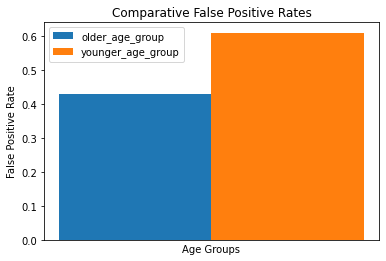

In [ ]:
# Error balance of false positives
age_probs = []
for age in [older_age_group, younger_age_group]:
  probs = []
  false_positive = age.loc[(age['Nurse High-Risk']==1) & (age['Discharged']==True)]
  false_positive_rate = len(false_positive) / len(age.loc[age['Nurse High-Risk']==1])
  probs.append(false_positive_rate)
  age_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), age_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), age_probs[1], align='edge', width=.1)
plt.xlabel("Age Groups")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Age groups"])
plt.ylabel("False Positive Rate")
plt.legend(["older_age_group", "younger_age_group"])
plt.title("Comparative False Positive Rates")
plt.show()

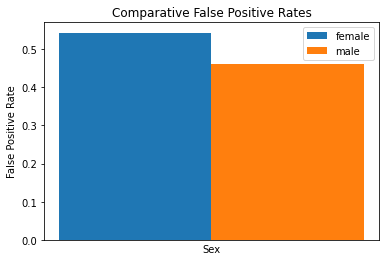

In [ ]:
# Error balance of false positives
sex_probs = []
for sex in [female, male]:
  probs = []
  false_positive = sex.loc[(sex['Nurse High-Risk']==1) & (sex['Discharged']==True)]
  false_positive_rate = len(false_positive) / len(sex.loc[sex['Nurse High-Risk']==1])
  probs.append(false_positive_rate)
  sex_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), sex_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), sex_probs[1], align='edge', width=.1)
plt.xlabel("Sex")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Sex"])
plt.ylabel("False Positive Rate")
plt.legend(["female", "male"])
plt.title("Comparative False Positive Rates")
plt.show()

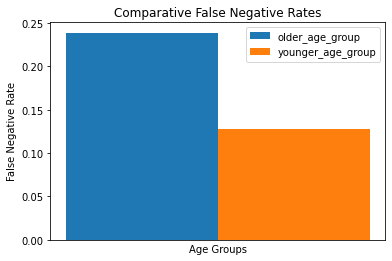

In [ ]:
# Error balance of false negatives
age_probs = []
for age in [older_age_group, younger_age_group]:
  probs = []
  false_negative = age.loc[(age['Nurse High-Risk']==0) & (age['Discharged']==False)]
  false_negative_rate = len(false_negative) / len(age.loc[age['Nurse High-Risk']==0]) 
  probs.append(false_negative_rate)
  age_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), age_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), age_probs[1], align='edge', width=.1)
plt.xlabel("Age Groups")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Age groups"])
plt.ylabel("False Negative Rate")
plt.legend(["older_age_group", "younger_age_group"])
plt.title("Comparative False Negative Rates")
plt.show()

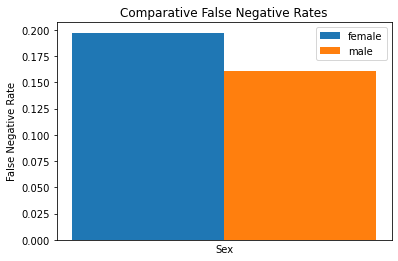

In [ ]:
# Error balance of false negatives
sex_probs = []
for sex in [female, male]:
  probs = []
  false_negative = sex.loc[(sex['Nurse High-Risk']==0) & (sex['Discharged']==False)]
  false_negative_rate = len(false_negative) / len(sex.loc[sex['Nurse High-Risk']==0]) 
  probs.append(false_negative_rate)
  sex_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), sex_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), sex_probs[1], align='edge', width=.1)
plt.xlabel("Sex")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Sex"])
plt.ylabel("False Negative Rate")
plt.legend(["female", "male"])
plt.title("Comparative False Negative Rates")
plt.show()

## Task 4. *(8 points)*

Repeat tasks 2 and 3 using expert triage ratings instead of nurse triage ratings. 
   - Are retrospective expert ratings more or less accurate than nurse scores? 
   - Are experts more or less fair than nurses, or about the same, by age and sex?


The retrospective expert ratings has a higher false positive rate of 52.4% (compared to nurse's 50%) and a slightly lower false negative rate of 17.79% (compared to nurse's 17.86%). All in all, expert ratings have about the same accuracy as nurse scores.

In terms of fairness, the expert ratings' false negative rate is higher for the younger age group than the older age group by more than 10%, which is an improvement compared with nurses' (around 20% disparity), and its false positive rate for the older age group is much higher for the younger age group by slightly more than 10%, which is similar to the nurse's ratings. However, the expert ratings' fairness in terms of sex is a little bit worse than nurses'. It's false positive rate for female is higher than male by slightly less than 10% and its false negative rate for female is much higher than male by more than 5%. The differences are greater than the nurse ratings, which are respectively by about 10% and 5%. To conclude, while expert ratings's fairness is slightly better than nurses in terms of age, it's a bit more unfair in terms of sex.


Distribution of expert triage scores
3    0.384373
4    0.362273
2    0.173639
5    0.059195
1    0.020521
Name: Expert Triage, dtype: float64



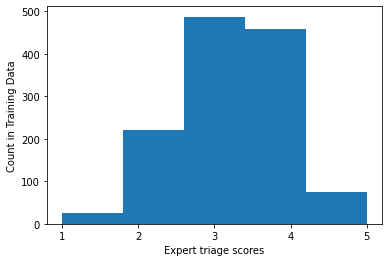

In [ ]:
print("Distribution of expert triage scores")
print(df['Expert Triage'].value_counts()/len(df))
print()

plt.hist(df['Expert Triage'], bins=5)
plt.xticks(np.arange(1, 6, 1))
plt.xlabel("Expert triage scores")
plt.ylabel("Count in Training Data")
plt.show()

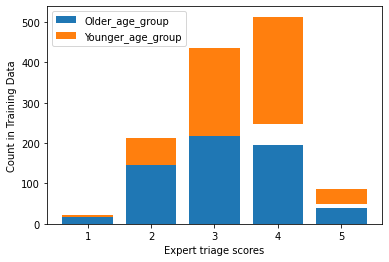

In [ ]:
plt.bar(older_age_group['Expert Triage'].value_counts().index, older_age_group['Expert Triage'].value_counts())
plt.bar(younger_age_group['Expert Triage'].value_counts().index, younger_age_group['Expert Triage'].value_counts(), bottom = older_age_group['Nurse Triage'].value_counts())
plt.legend(["Older_age_group", "Younger_age_group"])
plt.xlabel("Expert triage scores")
plt.ylabel("Count in Training Data")
plt.show()

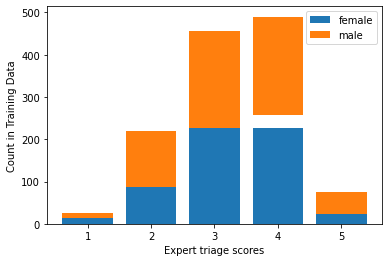

In [ ]:
plt.bar(female['Expert Triage'].value_counts().index, female['Expert Triage'].value_counts())
plt.bar(male['Expert Triage'].value_counts().index, male['Expert Triage'].value_counts(), bottom = female['Expert Triage'].value_counts())
plt.legend(["female", "male"])
plt.xlabel("Expert triage scores")
plt.ylabel("Count in Training Data")
plt.show()

In [ ]:
false_positive = df.loc[(df['Expert High-Risk']==1) & (df['Discharged']==True)]
false_positive_rate = len(false_positive) / len(df.loc[df['Expert High-Risk']==1])
print(f"The false positive rate for the whole population is {false_positive_rate}")

The false positive rate for the whole population is 0.5238744884038199


In [ ]:
false_negative = df.loc[(df['Expert High-Risk']==0) & (df['Discharged']==False)]
false_negative_rate = len(false_negative) / len(df.loc[df['Expert High-Risk']==0])
print(f"The false negative rate for the whole population is {false_negative_rate}")

The false negative rate for the whole population is 0.17790262172284643


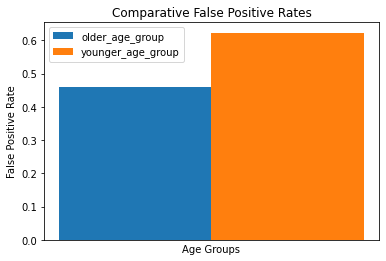

In [ ]:
# Error balance of false positives
age_probs = []
for age in [older_age_group, younger_age_group]:
  probs = []
  false_positive = age.loc[(age['Expert High-Risk']==1) & (age['Discharged']==True)]
  false_positive_rate = len(false_positive) / len(age.loc[age['Expert High-Risk']==1])
  probs.append(false_positive_rate)
  age_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), age_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), age_probs[1], align='edge', width=.1)
plt.xlabel("Age Groups")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Age groups"])
plt.ylabel("False Positive Rate")
plt.legend(["older_age_group", "younger_age_group"])
plt.title("Comparative False Positive Rates")
plt.show()

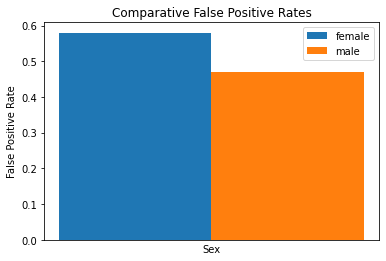

In [ ]:
# Error balance of false positives
sex_probs = []
for sex in [female, male]:
  probs = []
  false_positive = sex.loc[(sex['Expert High-Risk']==1) & (sex['Discharged']==True)]
  false_positive_rate = len(false_positive) / len(sex.loc[sex['Expert High-Risk']==1])
  probs.append(false_positive_rate)
  sex_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), sex_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), sex_probs[1], align='edge', width=.1)
plt.xlabel("Sex")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Sex"])
plt.ylabel("False Positive Rate")
plt.legend(["female", "male"])
plt.title("Comparative False Positive Rates")
plt.show()

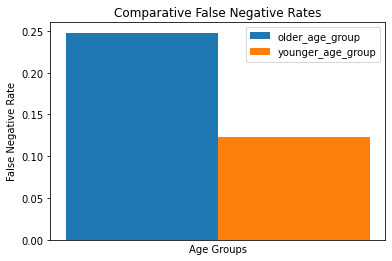

In [ ]:
# Error balance of false negatives
age_probs = []
for age in [older_age_group, younger_age_group]:
  probs = []
  false_negative = age.loc[(age['Expert High-Risk']==0) & (age['Discharged']==False)]
  false_negative_rate = len(false_negative) / len(age.loc[age['Expert High-Risk']==0]) 
  probs.append(false_negative_rate)
  age_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), age_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), age_probs[1], align='edge', width=.1)
plt.xlabel("Age Groups")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Age groups"])
plt.ylabel("False Negative Rate")
plt.legend(["older_age_group", "younger_age_group"])
plt.title("Comparative False Negative Rates")
plt.show()

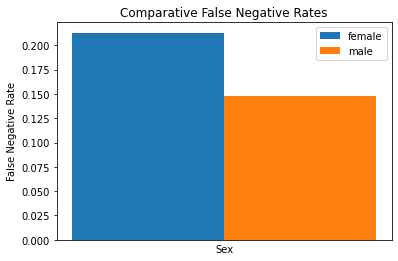

In [ ]:
# Error balance of false negatives
sex_probs = []
for sex in [female, male]:
  probs = []
  false_negative = sex.loc[(sex['Expert High-Risk']==0) & (sex['Discharged']==False)]
  false_negative_rate = len(false_negative) / len(sex.loc[sex['Expert High-Risk']==0]) 
  probs.append(false_negative_rate)
  sex_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), sex_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), sex_probs[1], align='edge', width=.1)
plt.xlabel("Sex")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Sex"])
plt.ylabel("False Negative Rate")
plt.legend(["female", "male"])
plt.title("Comparative False Negative Rates")
plt.show()

## Extra Credit *(up to 6 points)*

Thirteen additional attributes are available for analysis in this dataset:

Several attributes about the case itself:
   - Text descriptions of the primary patient complaint and the eventual patient diagnosis.
   - The patient’s arrival mode (how did they get to the hospital?)
   - A binary feature marking whether the visit is injury-related.
   - A nominal feature describing whether the patient was alert and responsive.
   - A binary feature marking whether the patient was in pain.
   - A numeric feature marking the patient’s self-reported pain, from 1 (least) to 10 (worst)

Several vital sign measurements from the patient:
   - Systolic and Diastolic blood pressure.
   - Heart rate
   - Respiratory (breathing) rate
   - Body Temperature
   - Oxygen Saturation

Train a machine learning model to predict triage scores using the additional columns in the dataset as features, and using either nurse or expert scores as your ground truth labels. Repeat tasks 2 and 3 using the predictions from a cross-validated model. 

   - Does the model replicate the accuracy of humans? 
   - Is the model equally fair? Why or why not?


### Building the ML Model

I decided to not use Pain Scale and Oxygen saturation as features because there are too many missing values. The dataset only has about 300 rows after I remove the missing values for these two columns. Since Diagnosis only has two missing values, I kept it as a feature. 

I used SVC as classifier because it has the highest level of accuracy among all classifiers and 'Nurse High-Risk' as ground truth labels.

In [ ]:
df.isnull().sum()

Age                    0
Sex                    0
Arrival mode           0
Complaint              0
Diagnosis              2
Injury                 0
Alertness              0
Pain                   0
Pain Scale           556
Systolic BP            0
Diastolic BP           0
Heart Rate             0
Respiratory Rate       0
Temperature            0
Oxygen Saturation    688
Nurse Triage           0
Expert Triage          0
Disposition            0
Nurse High-Risk        0
Expert High-Risk       0
Age Group              0
Discharged             0
dtype: int64

In [ ]:
df = df.dropna(subset=['Diagnosis'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

# List the features from the data
features = ["Complaint", "Diagnosis", "Injury", "Alertness", "Pain", "Systolic BP", "Diastolic BP", "Heart Rate", "Respiratory Rate", "Temperature"]

# Prepare our dataset
X = df[features]
X = pd.get_dummies(X)
y = df["Nurse High-Risk"]

# Use scikit-learn to create train/test split and train the decision tree
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)
model = SVC(kernel='poly').fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
train_accuracy = 100*accuracy_score(y_train, train_pred)
test_accuracy = 100*accuracy_score(y_test, test_pred)
print(f"Accuracy on the train set: {train_accuracy:.1f}")
print(f"Accuracy on the test set: {test_accuracy:.1f}")

Accuracy on the train set: 97.8
Accuracy on the test set: 70.4


In [ ]:
sample = df.loc[X_test.index, :]
sample['risk_prediction'] = test_pred

### Model Accuracy and Fairness

The model prediction has a slightly higher false positive rate (56.85%) and a slightly higher false negative rate (22.4%) compared to the accuracy of nurses, which has a false positive rate of 50.07% and a false negative rate of 17.86%.

The model is slightly less fair in terms of distribution among age subgroups and sex subgroups. The discrepancies in the false positive rate and false negative rate among the older age group and the younger age group, as well as female and male, have been enlarged. This shows that the model did not only replicate the existing unfairness, but also exaggerated the unfairness because the model is working on limited, feature-based pattern matching. As a result, the model will emphasize the stronger signals ignore smaller signals from weaker features, which will worsen the existing biases in the real world. 

In [ ]:
false_positive = sample.loc[(sample['risk_prediction']==1) & (sample['Discharged']==True)]
false_positive_rate = len(false_positive) / len(sample.loc[sample['risk_prediction']==1])
print(f"The false positive rate for the whole population is {false_positive_rate}")

The false positive rate for the whole population is 0.5684931506849316


In [ ]:
false_negative = sample.loc[(sample['risk_prediction']==0) & (sample['Discharged']==False)]
false_negative_rate = len(false_negative) / len(sample.loc[sample['risk_prediction']==0])
print(f"The false negative rate for the whole population is {false_negative_rate}")

The false negative rate for the whole population is 0.22429906542056074


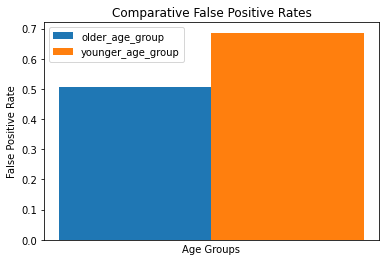

In [ ]:
older_age_group = sample.loc[sample['Age Group']==1]
younger_age_group = sample.loc[sample['Age Group']==0]

# Error balance of false positives
age_probs = []
for age in [older_age_group, younger_age_group]:
  probs = []
  false_positive = age.loc[(age['risk_prediction']==1) & (age['Discharged']==True)]
  false_positive_rate = len(false_positive) / len(age.loc[age['risk_prediction']==1])
  probs.append(false_positive_rate)
  age_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), age_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), age_probs[1], align='edge', width=.1)
plt.xlabel("Age Groups")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Age groups"])
plt.ylabel("False Positive Rate")
plt.legend(["older_age_group", "younger_age_group"])
plt.title("Comparative False Positive Rates")
plt.show()

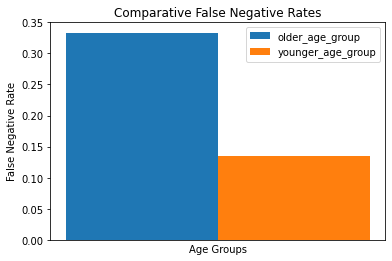

In [ ]:
# Error balance of false positives
age_probs = []
for age in [older_age_group, younger_age_group]:
  probs = []
  false_negative = age.loc[(age['risk_prediction']==0) & (age['Discharged']==False)]
  false_negative_rate = len(false_negative) / len(age.loc[age['risk_prediction']==0]) 
  probs.append(false_negative_rate)
  age_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), age_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), age_probs[1], align='edge', width=.1)
plt.xlabel("Age Groups")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Age groups"])
plt.ylabel("False Negative Rate")
plt.legend(["older_age_group", "younger_age_group"])
plt.title("Comparative False Negative Rates")
plt.show()

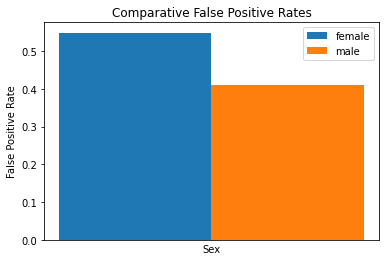

In [ ]:
female = sample.loc[sample['Sex']=='Female']
male = sample.loc[sample['Sex']=='Male']

# Error balance of false negatives
sex_probs = []
for sex in [female, male]:
  probs = []
  false_positive = sex.loc[(sex['Nurse High-Risk']==1) & (sex['Discharged']==True)]
  false_positive_rate = len(false_positive) / len(sex.loc[sex['Nurse High-Risk']==1])
  probs.append(false_positive_rate)
  sex_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), sex_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), sex_probs[1], align='edge', width=.1)
plt.xlabel("Sex")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Sex"])
plt.ylabel("False Positive Rate")
plt.legend(["female", "male"])
plt.title("Comparative False Positive Rates")
plt.show()

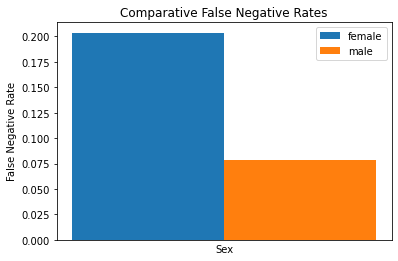

In [ ]:
# Error balance of false negatives
sex_probs = []
for sex in [female, male]:
  probs = []
  false_negative = sex.loc[(sex['Nurse High-Risk']==0) & (sex['Discharged']==False)]
  false_negative_rate = len(false_negative) / len(sex.loc[sex['Nurse High-Risk']==0]) 
  probs.append(false_negative_rate)
  sex_probs.append(probs)

fig = plt.gcf()
plt.bar(range(1,2), sex_probs[0], align='edge', width=-.1)
plt.bar(range(1,2), sex_probs[1], align='edge', width=.1)
plt.xlabel("Sex")
plt.xticks(ticks=range(1,2))
plt.xticks([0], ["Sex"])
plt.ylabel("False Negative Rate")
plt.legend(["female", "male"])
plt.title("Comparative False Negative Rates")
plt.show()